## cost가 최소화되는 W의 위치 찾기

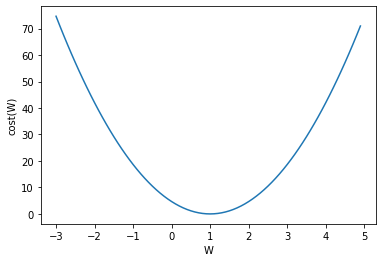

In [2]:
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt

with tf.Session() as sess:
  X=[1,2,3]
  Y=[1,2,3]
  W=tf.placeholder(tf.float32)

  hypothesis=W*X
  cost=tf.reduce_mean(tf.square(hypothesis-Y))

  sess.run(tf.global_variables_initializer())

  W_val=[]
  cost_val=[]

  for i in range(-30,50):
    feed_W=i*0.1
    curr_cost,curr_W=sess.run([cost,W],feed_dict={W:feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)

plt.plot(W_val,cost_val)
plt.xlabel('W')
plt.ylabel('cost(W)')
plt.show()

## 최적의 W 찾기
: 컴퓨터가 스스로 최적의 W을 찾아내도록

### 1. 수동으로 Gradient descent 적용하여 계산하기
: 직접 미분해줌

In [4]:
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt

with tf.Session() as sess:
  x_data=[1,2,3]
  y_data=[1,2,3]

  W=tf.Variable(tf.random_normal([1]),name='weight')
  X=tf.placeholder(tf.float32)
  Y=tf.placeholder(tf.float32)

  hypothesis=W*X
  cost=tf.reduce_sum(tf.square(hypothesis-Y))

  #Minimize: Using Gradient Descent
  learning_rate=0.1
  gradient=tf.reduce_mean((W*X-Y)*X)
  descent=W-learning_rate*gradient
  update=W.assign(descent)

  sess.run(tf.global_variables_initializer())

  for step in range(21):
    sess.run(update,feed_dict={X:x_data,Y:y_data})
    print(step, sess.run(cost,feed_dict={X:x_data,Y:y_data}),sess.run(W))

0 2.5865698 [0.5701687]
1 0.7357352 [0.77075666]
2 0.20927578 [0.87773687]
3 0.05952735 [0.934793]
4 0.016932175 [0.96522295]
5 0.004816279 [0.9814522]
6 0.0013699657 [0.99010783]
7 0.00038968743 [0.99472415]
8 0.00011084015 [0.99718624]
9 3.152852e-05 [0.99849933]
10 8.968316e-06 [0.9991996]
11 2.551578e-06 [0.9995731]
12 7.2579667e-07 [0.9997723]
13 2.064247e-07 [0.9998786]
14 5.8614503e-08 [0.99993527]
15 1.6661875e-08 [0.9999655]
16 4.7556235e-09 [0.9999816]
17 1.3576376e-09 [0.99999017]
18 3.85171e-10 [0.99999475]
19 1.0887291e-10 [0.9999972]
20 3.1622704e-11 [0.9999985]


### 2. 자동으로 계산하기
: 미분 계산할 필요가 없음

In [6]:
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt

with tf.Session() as sess:
  X=[1,2,3]
  Y=[1,2,3]

  #W=tf.Variable(5.0)
  W=tf.Variable(-3.0)

  hypothesis=W*X
  cost=tf.reduce_mean(tf.square(hypothesis-Y))
  
  #Minimize
  optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.1)
  train=optimizer.minimize(cost)

  sess.run(tf.global_variables_initializer())

  for step in range(21):
    print(step, sess.run(W))
    sess.run(train)

0 -3.0
1 0.73333365
2 0.98222226
3 0.9988148
4 0.99992096
5 0.9999947
6 0.99999964
7 0.99999994
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0


**W의 초기값**이 어떠한 수가 들어가더라도, 최종적으로 최소의 cost에 해당하는 W를 찾을 수 있음.

### 2-1. 자동으로 계산할 때, Gradient를 수정하고 싶은 경우

In [9]:
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt

with tf.Session() as sess:
  X=[1,2,3]
  Y=[1,2,3]

  W=tf.Variable(5.0)
  
  hypothesis=W*X
  cost=tf.reduce_mean(tf.square(hypothesis-Y))

  #Minimize
  optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.1)
  
  #Gradient 수정
  gvs=optimizer.compute_gradients(cost,[W])
  #### 수정하기 ####
  apply_gradients=optimizer.apply_gradients(gvs)

  sess.run(tf.global_variables_initializer())

  for step in range(21):
    print(step, sess.run(gvs))
    sess.run(apply_gradients)

0 [(37.333336, 5.0)]
1 [(2.4888866, 1.2666664)]
2 [(0.1659259, 1.0177778)]
3 [(0.011061668, 1.0011852)]
4 [(0.00073742867, 1.000079)]
5 [(4.8955284e-05, 1.0000052)]
6 [(3.0994415e-06, 1.0000004)]
7 [(0.0, 1.0)]
8 [(0.0, 1.0)]
9 [(0.0, 1.0)]
10 [(0.0, 1.0)]
11 [(0.0, 1.0)]
12 [(0.0, 1.0)]
13 [(0.0, 1.0)]
14 [(0.0, 1.0)]
15 [(0.0, 1.0)]
16 [(0.0, 1.0)]
17 [(0.0, 1.0)]
18 [(0.0, 1.0)]
19 [(0.0, 1.0)]
20 [(0.0, 1.0)]


### 3. 수동으로 계산한 결과와 자동으로 계산한 결과의 차이

In [16]:
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt

with tf.Session() as sess:
  X=[1,2,3]
  Y=[1,2,3]

  W=tf.Variable(5.0)
  
  hypothesis=W*X

  #수동으로 계산한 Gradient
  gradient=tf.reduce_mean((W*X-Y)*X)*2

  #자동으로 계산한 Gradient
  cost=tf.reduce_mean(tf.square(hypothesis-Y))

  #Minimize
  optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01)
  
  #Gradient 수정
  gvs=optimizer.compute_gradients(cost,[W])
  #### 수정하기 ####
  apply_gradients=optimizer.apply_gradients(gvs)

  sess.run(tf.global_variables_initializer())

  for step in range(100):
    if step%10==0:
      print(step, sess.run([gradient,W,gvs]))
    sess.run(apply_gradients)

0 [37.333332, 5.0, [(37.333336, 5.0)]]
10 [14.014362, 2.5015388, [(14.014362, 2.5015388)]]
20 [5.2607765, 1.5636547, [(5.2607765, 1.5636547)]]
30 [1.9748148, 1.2115873, [(1.9748147, 1.2115873)]]
40 [0.7413165, 1.0794268, [(0.7413165, 1.0794268)]]
50 [0.27827826, 1.0298156, [(0.2782783, 1.0298156)]]
60 [0.10446167, 1.0111923, [(0.10446167, 1.0111923)]]
70 [0.03921318, 1.0042014, [(0.03921318, 1.0042014)]]
80 [0.014720838, 1.0015773, [(0.014720838, 1.0015773)]]
90 [0.005525271, 1.000592, [(0.0055252714, 1.000592)]]


차례대로 수동의 gradient, W,자동의 gradient, W이다.<br>
즉, **수동**으로 계산한 결과와 **자동**으로 계산한 결과는 **동일하다.**